In [1]:
#import libraries
import keras
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
batch_size = 256
num_classes = 10
epochs = 2

In [3]:
# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# input image dimensions
img_rows, img_cols = X_train[0].shape

# Reshaping the data to use it in our network
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Scaling the data
X_train = X_train / 255.0
X_test = X_test / 255.0

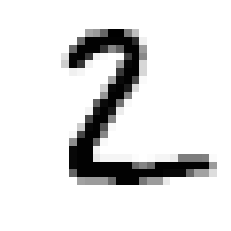

In [5]:
plt.imshow(X_test[1][..., 0], cmap='Greys')
plt.axis('off')
plt.show()

In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
loss = 'categorical_crossentropy'
optimizer = 'adam'

model.compile(
    loss=loss, optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)

print(f'Test loss: { score[0]} - Test accuracy: {score[1]}')

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 51s 857us/step - loss: 0.0627 - accuracy: 0.9813 - val_loss: 0.0350 - val_accuracy: 0.9884
Epoch 2/2
60000/60000 [==============================] - 52s 870us/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0318 - val_accuracy: 0.9896
Test loss: 0.03183137079750886 - Test accuracy: 0.9896000027656555


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              